This file tests marching errors of the different approximations of coefficients in the ETD2RK and ETD4RK methods

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
from decimal import *
getcontext().prec = 64

In [3]:
c = -100
## ^ for posterity

def F(t):
    # our non linear component
    return np.sin(t)

def timestep(u_n, I, h):
    # u_n is the previous time step
    # I is the integral of the non linear part
    # h is out time step width
    return u_n*np.exp(c*h) + I

#Now using the rk2 method
def I_RK2(t,h,a1,b1):
    f1 = F(t)
    f2 = F(t+h)

    ##a1 and b1 defined in ETDRK2

    part1 = f1*a1

    part2 =(f2-f1)*b1

    return  (part1 + part2)
    

In [4]:
T = Total_Time = np.pi/2
N = Number_of_Points = 10
u_0 = Initial_Condition = 1
c = -100
h = T/N ## calculate the step size based on the number of points
tvec = np.arange(N+1)*h

In [5]:
def ETDRK2(Total_Time, Number_of_Points, Initial_Condition, method = "taylor", debug = False):
    T = Total_Time
    N = int(Number_of_Points)
    u_0 = Initial_Condition

    h = (T/N)  ## calculate the step size based on the number of points
    tvec = np.arange(N+1)*h
    uvec = np.zeros(N+1)
    uvec[0] = u_0


    if debug:
        print("method is", method)
        print("h's value is", h, "type:", type(h))
    ## calculate coefficients to be used in the integral
    if method == "taylor":
        print("alpha")
        a1 = h   + (c*h**2)/2 + (c**2*h**3)/6 + (c**3*h**4)/24 ## (e^(ch)-1)/c
        b1 = h/2 + (c*h**2)/6 + (c**2*h**3)/24 ## (e^(ch) - (1 + ch))/(h*c^2)
        if debug:
            print("a1:", a1, ", b1:", b1)

    elif method == "contour":
        print("beta")
        M = 32  # number of points for complex means
        r = np.exp(1j * np.pi * (np.arange(1, M + 1)-0.5) / M)
        z = c*h + r
        a1 = h*np.mean((np.exp(z)-1)/z).real
        b1 =  h*np.mean((np.exp(z)-1-z)/(z**2)).real
        if debug:
            print("a1:", a1, ", b1:", b1)

    elif method == "naive":
        print("kappa")
        a1 = (np.exp(c*h)-1)/c
        b1 = (np.exp(c*h)-1-c*h)/(h*(c**2))
        if debug:
            print("a1:", a1, ", b1:", b1)
            
    else:
        raise ValueError("method must be contour, taylor or naive")




    for i in range(N):
        uvec[i+1] = uvec[i]*np.exp(c*h) + F(tvec[i])*a1 + (F(tvec[i+1])-F(tvec[i]))*b1
    
    return uvec,tvec

In [6]:
T = Total_Time = np.pi/2
N = Number_of_Points = int((np.pi/2)*(10**(7)))
u_0 = Initial_Condition = 1
c = -100
h = T/N ## calculate the step size based on the number of points
tvec = np.arange(N+1)*h

In [7]:
def U_true(t,u_0):
    return u_0*np.exp(c*t) + (np.exp(c*t)-c*np.sin(t)-np.cos(t))/(1+c**2)

In [8]:
y_contour,x = ETDRK2(T,N,u_0, method="contour", debug = True)
y_naive,x = ETDRK2(T,N,u_0, method="naive", debug = True)
y_taylor,x = ETDRK2(T,N,u_0, method="taylor", debug = True)



method is contour
h's value is 1.0000000170581613e-07 type: <class 'float'>
beta
a1: 9.999950170746573e-08 , b1: 4.999983418665237e-08
method is naive
h's value is 1.0000000170581613e-07 type: <class 'float'>
kappa
a1: 9.999950170702654e-08 , b1: 4.9999878106195484e-08
method is taylor
h's value is 1.0000000170581613e-07 type: <class 'float'>
alpha
a1: 9.999950170746574e-08 , b1: 4.9999834186652377e-08


c:\Users\Eleph\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\Eleph\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


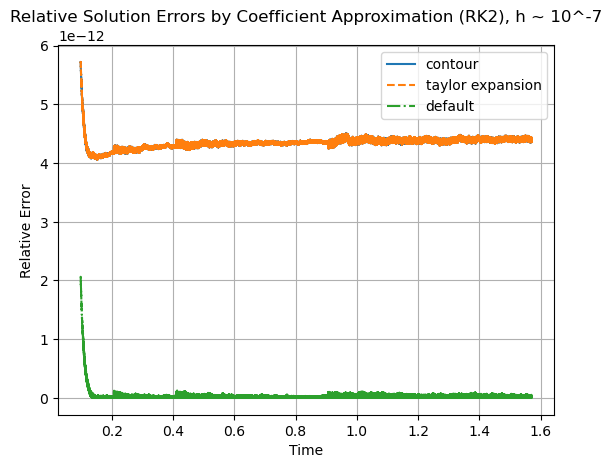

In [9]:
skipper = int(x.size/16)

xnew = x[skipper:]

plt.plot(xnew,np.abs((y_contour[skipper:] - U_true(xnew,1))/U_true(xnew,1)), label = "contour")
plt.plot(xnew,np.abs((y_taylor[skipper:] - U_true(xnew,1))/U_true(xnew,1)), label = "taylor expansion", linestyle = "--")
plt.plot(xnew,np.abs((y_naive[skipper:] - U_true(xnew,1))/U_true(xnew,1)), label = "default", linestyle = "dashdot")

plt.xlabel("Time")
plt.ylabel("Relative Error")
plt.title("Relative Solution Errors by Coefficient Approximation (RK2), h ~ 10^-7")
plt.legend()
plt.grid()

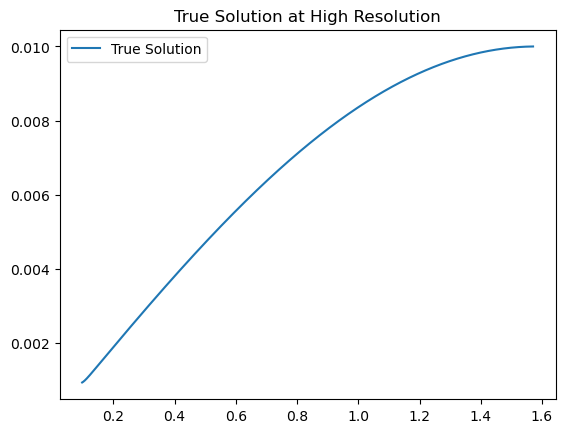

In [22]:
plt.plot(x[skipper:],U_true(x,1)[skipper:], label = "True Solution")
plt.legend()
plt.title("True Solution at High Resolution")
plt.show()

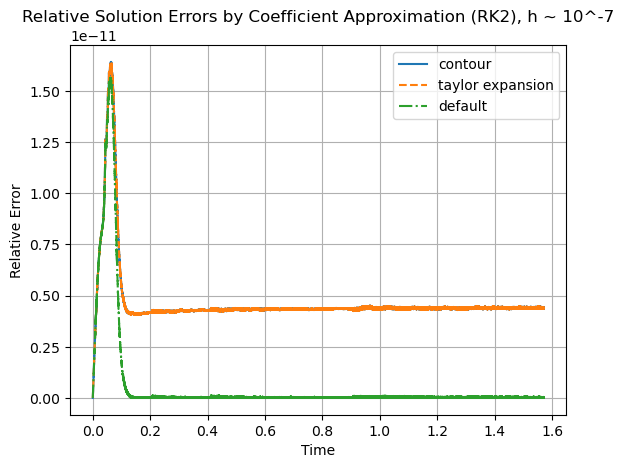

In [10]:
skipper = int(x.size/16)

xnew = x[skipper:]

plt.plot(x,np.abs((y_contour - U_true(x,1))/U_true(x,1)), label = "contour")
plt.plot(x,np.abs((y_taylor - U_true(x,1))/U_true(x,1)), label = "taylor expansion", linestyle = "--")
plt.plot(x,np.abs((y_naive - U_true(x,1))/U_true(x,1)), label = "default", linestyle = "dashdot")

plt.xlabel("Time")
plt.ylabel("Relative Error")
plt.title("Relative Solution Errors by Coefficient Approximation (RK2), h ~ 10^-7")
plt.legend()
plt.grid()

In [11]:
T = Total_Time = np.pi/2
N = Number_of_Points = int((np.pi/2)*(10**(6)))
u_0 = Initial_Condition = 1
c = -100
h = T/N ## calculate the step size based on the number of points
tvec = np.arange(N+1)*h

In [12]:
y_contour,x = ETDRK2(T,N,u_0, method="contour", debug = True)
y_naive,x = ETDRK2(T,N,u_0, method="naive", debug = True)
y_taylor,x = ETDRK2(T,N,u_0, method="taylor", debug = True)

method is contour
h's value is 1.000000208044136e-06 type: <class 'float'>
beta
a1: 9.999502096899575e-07 , b1: 4.999834377651251e-07
method is naive
h's value is 1.000000208044136e-06 type: <class 'float'>
kappa
a1: 9.999502096902368e-07 , b1: 4.999834349732154e-07
method is taylor
h's value is 1.000000208044136e-06 type: <class 'float'>
alpha
a1: 9.999502096899575e-07 , b1: 4.999834377651335e-07


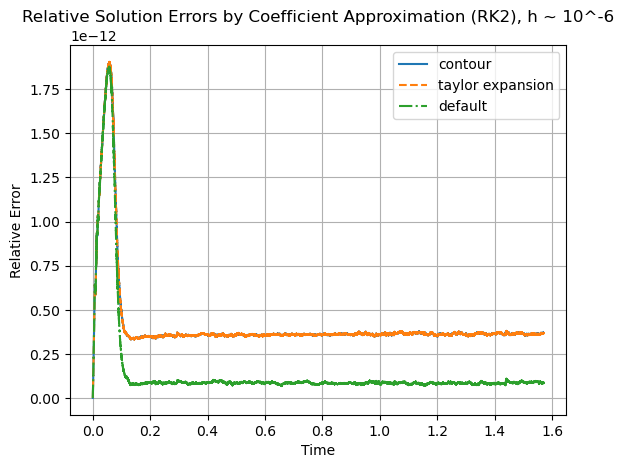

In [25]:
plt.plot(x,np.abs((y_contour - U_true(x,1))/U_true(x,1)), label = "contour")
plt.plot(x,np.abs((y_taylor - U_true(x,1))/U_true(x,1)), label = "taylor expansion", linestyle = "--")
plt.plot(x,np.abs((y_naive - U_true(x,1))/U_true(x,1)), label = "default", linestyle = "dashdot")

plt.xlabel("Time")
plt.ylabel("Relative Error")
plt.title("Relative Solution Errors by Coefficient Approximation (RK2), h ~ 10^-6")
plt.legend()
plt.grid()


method is naive
h's value is 1.000000208044136e-06 type: <class 'float'>
kappa
a1: 9.999502096902368e-07 , b1: 4.999834349732154e-07


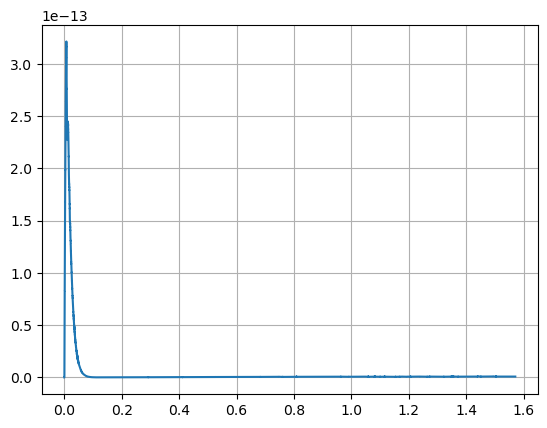

In [14]:
y,x = ETDRK2(T,N,u_0, method="naive", debug = True)
plt.plot(x,np.abs(y - U_true(x,1)))
plt.grid()

method is taylor
h's value is 1.000000208044136e-06 type: <class 'float'>
alpha
a1: 9.999502096899575e-07 , b1: 4.999834377651335e-07


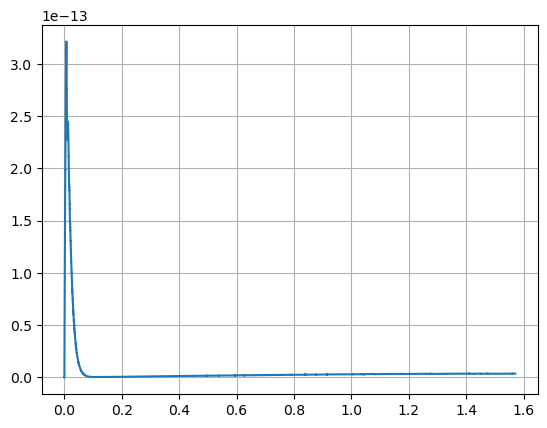

In [15]:
y,x = ETDRK2(T,N,u_0, method="taylor", debug = True)
plt.plot(x,np.abs(y - U_true(x,1)))
plt.grid()

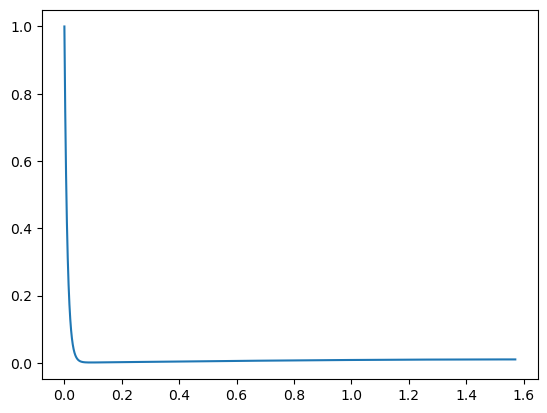

In [16]:
plt.plot(x,U_true(x,1))

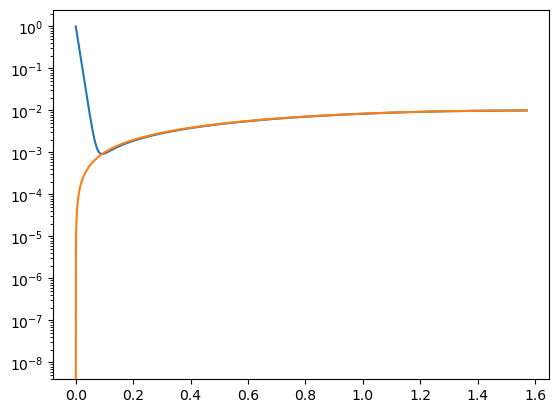

In [17]:
plt.semilogy(x, U_true(x,1))
plt.plot(x, 0.01*np.sin(x))